In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import scale
from sklearn import datasets

In [195]:
df = pd.read_csv('iris-dataset.csv')

In [196]:
iris = datasets.load_iris()

In [197]:
x = iris.data[:]
y = iris.target

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [198]:
df = pd.DataFrame(x, columns=cols)

In [199]:
cols_y = ['species']
target = pd.DataFrame(y, columns = cols_y)

In [200]:
kmeans =  KMeans(n_clusters = 3)

In [201]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [202]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [203]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [204]:
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

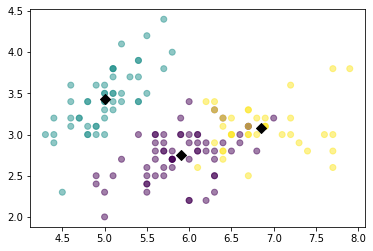

In [211]:
plt.scatter(x = df.sepal_length, y = df.sepal_width, c=labels, alpha=0.5)

plt.scatter(centroid_x, centroid_y, marker='D', s=50, c='Black')
plt.show();

In [127]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [135]:
target = target.replace(0, 'setosa')
target = target.replace(1, 'versicolar')
target = target.replace(2, 'virginica')

In [137]:
target['nmbr'] = labels

In [212]:
target.head()

,species
0,0
1,0
2,0
3,0
4,0


In [140]:
pd.crosstab(target['nmbr'], target['species'])

species,setosa,versicolar,virginica
nmbr,,,
0,0,2,36
1,50,0,0
2,0,48,14


In [142]:
kmeans.inertia_

78.851441426146

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204]


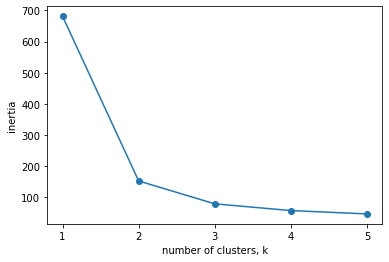

In [144]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
print(inertias)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [149]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(x)

# Calculate the cluster labels: labels
labels = pipeline.predict(x)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species':target['species']})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.species)

# Display ct
ct


species,setosa,versicolar,virginica
labels,,,
0,0,39,14
1,50,0,0
2,0,11,36


## Hierarchical clustering

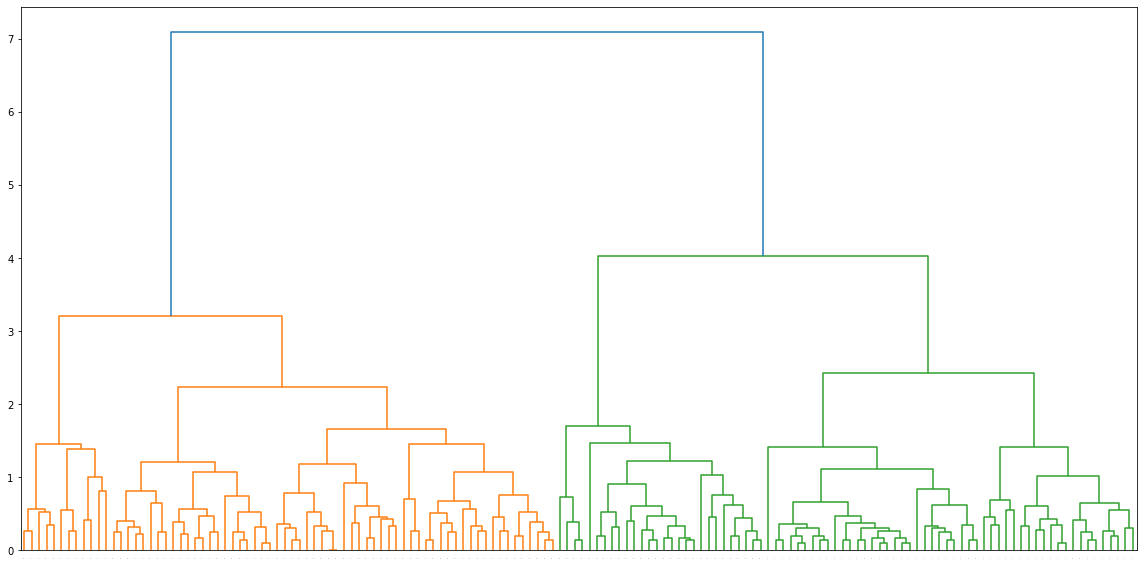

In [174]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(x, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=1,
)
plt.show()

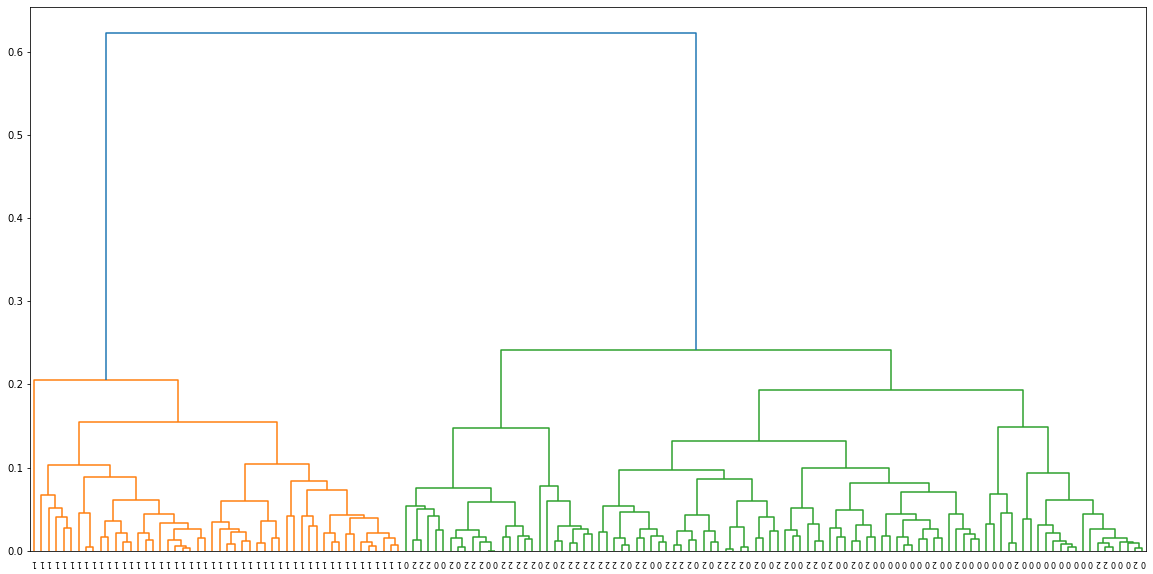

In [173]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(x)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
plt.figure(figsize=(20,10))
dendrogram(
    mergings,
    labels = labels,
    leaf_rotation = 180,
    leaf_font_size=8
)

plt.show()

## Example 1

In [175]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

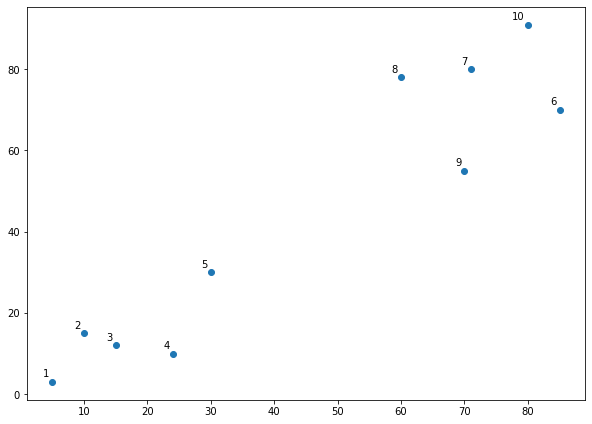

In [176]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()


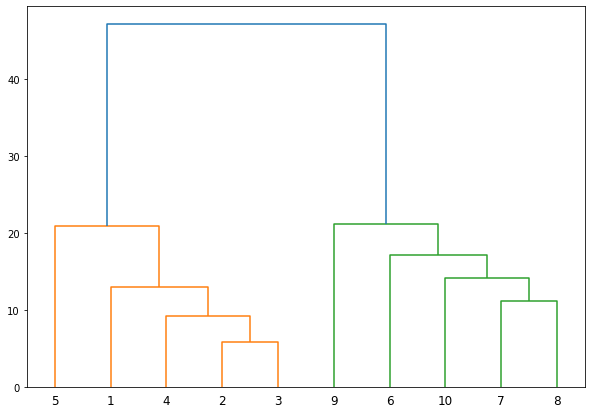

In [177]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [179]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [180]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [181]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


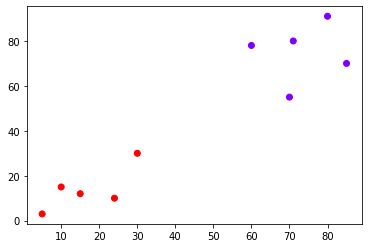

In [182]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## Example 2

In [183]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [184]:
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [185]:
customer_data.shape

(200, 5)

In [186]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [187]:
data = customer_data.iloc[:, 3:5].values

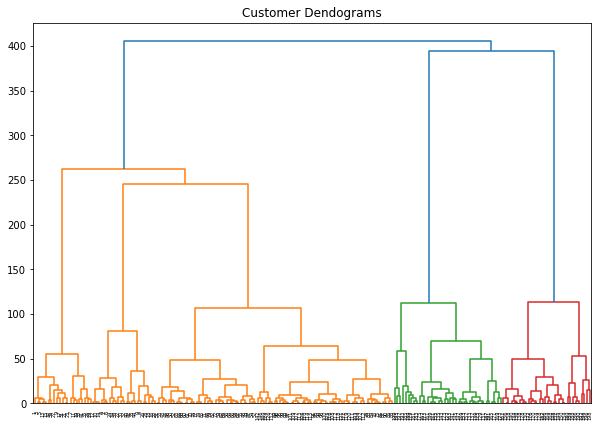

In [188]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [189]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

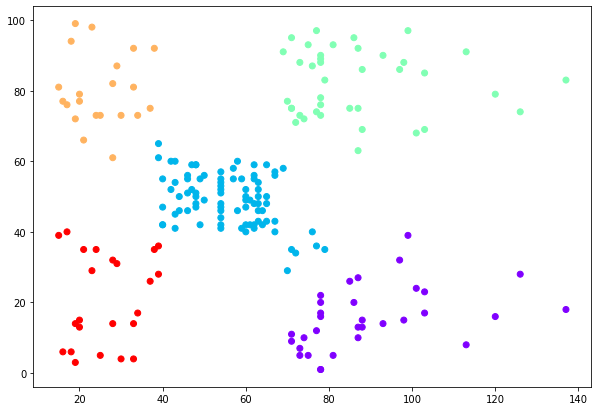

In [191]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow');